# Compare Unets with 2 inputs

Vanilla u net  
Unet with 2 inputs  
Unet with 2 inputs on different depth  
Double U net  
Triple U net

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/M_DV_V2022

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/M_DV_V2022


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Input 

from unet_detection.models.vanilla_unet import vanilla_unet
from unet_detection.models.unet_2input import unet_2input
from unet_detection.models.unet_2input_deep import unet_2input_deep
from unet_detection.models.double_unet import double_unet
from unet_detection.models.triple_unet import triple_unet

### All nets

In [5]:
seed = 123

vUnet = vanilla_unet(seed)
unet2i = unet_2input(seed)
unet2i_d = unet_2input_deep(seed)
dUnet = double_unet(seed)
tUnet = triple_unet(seed)

### Import data set and show

In [6]:
X_train = np.load("data/u_net_roofs/X_data.npy") 
X_70_train = np.load("data/u_net_roofs/X_70_data.npy")
y_train = np.load("data/u_net_roofs/y_data.npy")

X_val = np.load("data/u_net_roofs/X_data_val.npy")
X_70_val = np.load("data/u_net_roofs/X_70_data_val.npy")
y_val = np.load("data/u_net_roofs/y_data_val.npy")

X_test = np.load("data/u_net_roofs/X_data_test.npy")
X_70_test = np.load("data/u_net_roofs/X_70_data_test.npy")
y_test = np.load("data/u_net_roofs/y_data_test.npy")

In [7]:
def redesign_y(y):
  n,r1,c1,d = y.shape
  # Adds a new dimension of layer too have two class problem.
  yy = np.append(y, np.zeros((n, r1, c1,d)), axis=3)
  for i in range(int(y.max()-1)):  
    yy = np.append(yy, np.zeros((n, r1, c1,d)), axis=3)
  yy1 = yy.copy()
  yy1[:,:,:,0] = 0 # reset map
  for i in range(n):
    values = yy[i,:,:,0]
    for r in range(r1):
      for c in range(c1):
        value = yy[i,r,c,0]
        yy1[i,r,c,int(value)] = 1

  return yy1

In [8]:
y_train = redesign_y(y_train)
y_val = redesign_y(y_val)
y_test = redesign_y(y_test)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(100, 128, 128, 2)
(20, 128, 128, 2)
(50, 128, 128, 2)


In [9]:
# Scale image down so each border is the same size when upsizing!
X_70_train = X_70_train[:,4:-4,4:-4,:]
X_70_val = X_70_val[:,4:-4,4:-4,:]
X_70_test = X_70_test[:,4:-4,4:-4,:]

### Set up nets

In [19]:
input_img1 = Input(shape=(128,128,177))
input_img2 = Input(shape=(56,56,220))

model = dUnet.get_unet(input_img1, input_img2, n_classes=2, last_activation='softmax')

model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

## Run tests

In [20]:
hhh = model.fit([X_train, X_70_train],
               y_train, 
               validation_data=([X_val, X_70_val],y_val), 
               batch_size=16,
               epochs=10)

Epoch 1/10
7/7 [==============================] - 7s 403ms/step - loss: 0.7134 - accuracy: 0.5669 - val_loss: 342.7741 - val_accuracy: 0.1269
Epoch 2/10
7/7 [==============================] - 1s 151ms/step - loss: 0.5331 - accuracy: 0.8690 - val_loss: 3532.6548 - val_accuracy: 0.1309
Epoch 3/10
7/7 [==============================] - 1s 172ms/step - loss: 0.4537 - accuracy: 0.9001 - val_loss: 250.4476 - val_accuracy: 0.1322
Epoch 4/10
7/7 [==============================] - 1s 161ms/step - loss: 0.3985 - accuracy: 0.9211 - val_loss: 1195.1451 - val_accuracy: 0.1268
Epoch 5/10
7/7 [==============================] - 1s 151ms/step - loss: 0.3704 - accuracy: 0.9255 - val_loss: 36.8153 - val_accuracy: 0.1292
Epoch 6/10
7/7 [==============================] - 1s 149ms/step - loss: 0.3525 - accuracy: 0.9277 - val_loss: 1548.6722 - val_accuracy: 0.1299
Epoch 7/10
7/7 [==============================] - 1s 154ms/step - loss: 0.3261 - accuracy: 0.9382 - val_loss: 135.9498 - val_accuracy: 0.1301
Epoc

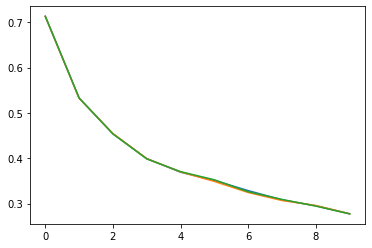

In [21]:
plt.plot(h.history['loss'])
plt.plot(hh.history['loss'])
plt.plot(hhh.history['loss'])